<a href="https://colab.research.google.com/github/JunaidRaza78/Image-Classification/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy

import os
import io
import zipfile
import random
import shutil
from shutil import copyfile
from PIL import Image
from tensorflow.keras import datasets, layers, models

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:50]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","cars","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

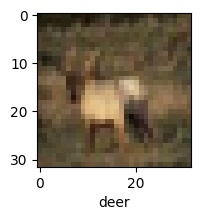

In [ ]:
plot_sample(X_train, y_train, 3)

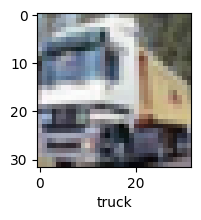

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 148s 95ms/step - loss: 1.8176 - accuracy: 0.3506
Epoch 2/10
1563/1563 [==============================] - 149s 96ms/step - loss: 1.6242 - accuracy: 0.4215
Epoch 3/10
1563/1563 [==============================] - 148s 95ms/step - loss: 1.5371 - accuracy: 0.4558
Epoch 4/10
1563/1563 [==============================] - 149s 95ms/step - loss: 1.4751 - accuracy: 0.4759
Epoch 5/10
1563/1563 [==============================] - 147s 94ms/step - loss: 1.4226 - accuracy: 0.4953
Epoch 6/10
1563/1563 [==============================] - 149s 96ms/step - loss: 1.3782 - accuracy: 0.5125
Epoch 7/10
1563/1563 [==============================] - 147s 94ms/step - loss: 1.3341 - accuracy: 0.5279
Epoch 8/10
1563/1563 [==============================] - 151s 97ms/step - loss: 1.3003 - accuracy: 0.5409
Epoch 9/10
1563/1563 [==============================] - 150s 96ms/step - loss: 1.2593 - accuracy: 0.5550
Epoch 10/10
1563/1563 [==============================] 

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 32ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.56      0.60      1000
           1       0.64      0.66      0.65      1000
           2       0.35      0.40      0.37      1000
           3       0.43      0.25      0.31      1000
           4       0.39      0.56      0.46      1000
           5       0.60      0.21      0.32      1000
           6       0.50      0.65      0.57      1000
           7       0.61      0.55      0.58      1000
           8       0.73      0.58      0.65      1000
           9       0.45      0.71      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.51     10000
weighted avg       0.53      0.51      0.51     10000



In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
Total params: 12,725,510
Trainable params: 12,725,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.8526 - accuracy: 0.7046
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8270 - accuracy: 0.7122
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7967 - accuracy: 0.7243
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7761 - accuracy: 0.7316
Epoch 5/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.7538 - accuracy: 0.7377
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7333 - accuracy: 0.7456
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7146 - accuracy: 0.7520
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6972 - accuracy: 0.7567
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6748 - accuracy: 0.7644
Epoch 10/10
1563/1563 [==============================] - 70s 45m

In [ ]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 4s 12ms/step - loss: 0.9694 - accuracy: 0.6788


[0.9693975448608398, 0.6787999868392944]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[2.07196129e-03, 1.24400156e-03, 9.73833911e-03, 6.87475860e-01,
        3.57890665e-03, 1.44680753e-01, 8.21426045e-03, 3.93200144e-02,
        1.02273442e-01, 1.40251813e-03],
       [2.62255445e-02, 1.92940474e-01, 4.28813742e-04, 3.79859353e-04,
        6.60474470e-05, 2.13194813e-04, 1.96847919e-04, 2.68433196e-05,
        7.75514543e-01, 4.00777813e-03],
       [9.94662493e-02, 2.14345474e-02, 6.24091481e-04, 1.08847069e-03,
        2.75891449e-04, 1.08623135e-04, 3.58277612e-04, 2.38032531e-04,
        8.57662022e-01, 1.87437702e-02],
       [9.72346544e-01, 5.83614921e-03, 1.53933559e-03, 1.19106313e-04,
        2.32273524e-04, 2.53886956e-05, 1.28689484e-04, 1.00399680e-04,
        1.85361113e-02, 1.13607291e-03],
       [4.02032078e-04, 1.41897937e-04, 1.57745760e-02, 2.47111693e-02,
        2.35188767e-01, 1.07977190e-03, 7.20006227e-01, 4.33799760e-05,
        2.63961381e-03, 1.25729530e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

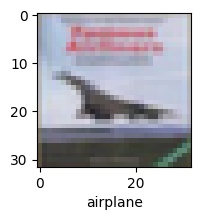

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

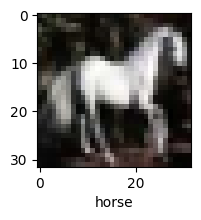

In [ ]:
plot_sample(X_test, y_test,13)

In [ ]:
classes[y_classes[13]]

'horse'

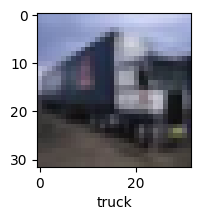

In [ ]:
plot_sample(X_test, y_test,34)

In [ ]:
classes[y_classes[34]]

'truck'

In [ ]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 5, 5, 64)          16448     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 2, 64)        